<a href="https://colab.research.google.com/github/francoisbirgand/BAE204-Qlab/blob/master/QClab_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ERROR: ignored

# Introduction to hydrographs, chemographs, concentrations, and loads

At the end of this lab, you should be able to:

- Recognize a hydrograph and name its descriptors
- Calculate cumulative flow volumes 
- Construct flow duration curves and compare them between small and large watersheds
- Recognize a chemograph and define its descriptors
- Summarize what the arithmetic average and median concentrations are for common pollutants in mostly agricultural watersheds
- Calculate cumulative loads at the event and yearly scale
- Distinguish between arithmetic and flow weighted concentrations for a variety of common pollutants in mostly agricultural watersheds
- Recognize the importance of high flows to the export of pollutants in watersheds

</br></br>

## Hydrographs as the basic hydrologist tool

In hydrology, we work with time series of flow rates and concentrations, and many of the conclusions we make are based on the calculations of water and nutrient fluxes. The title of this paragraph is time series. Indeed, in hydrology we measure flow not on a continuous basis, but rather at a given frequency. In hydrology, we have been able to make measurements at a high frequency (hourly or smaller), for over 100 years. From this high frequency data, it is possible to obtain a visual representation of the variations of flow. 

The first example below is an example of what we refer to as a simple hydrograph, which follows a rainfall event, with an initial baseflow, a rapidly rising limb, a flow peak, and a more slowly falling limb.





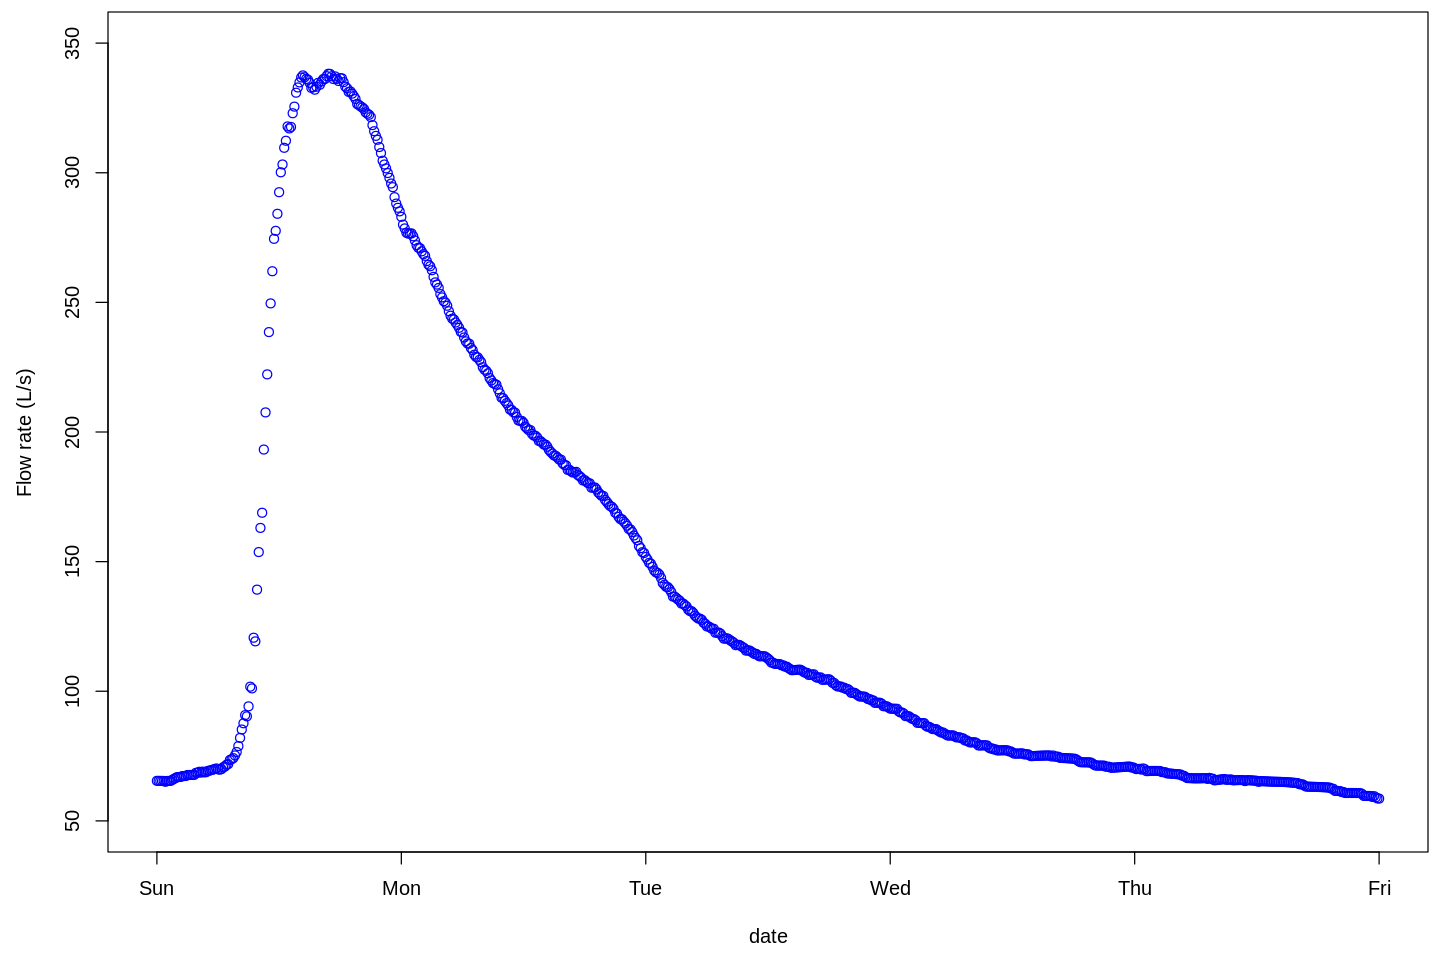

In [3]:
hydgph<-read.csv(file = "hydgph.csv", header = TRUE)
options(repr.plot.width=12, repr.plot.height=8)
names(hydgph)=c("date","Q","NO3")
date=as.POSIXct(hydgph$date, format = "%Y-%m-%d %H:%M:%S") # transforms the first column of the file, which are characters into dates that R understands
Q=hydgph$Q*1000 # Puts in the variable Q the flow rates, which are orginally in m³/s to L/s for better visualization
par(mar=c(4.5,4.5,0.5,0.5))
xlimHG=as.POSIXct(c("1999-01-03 00:00:00","1999-01-08 00:00:00"));ylimHG=c(50,350) # this defines the plotting ranges for the x and y axes
plot(date,Q,xlab = "date",ylab = "Flow rate (L/s)",type = "p",col="blue",xlim=xlimHG,ylim=ylimHG) # this plots the hydrograph

Although the points are disjointed, it is very tempting to add a line between them, as our observations and intuitions tell us that there is a pattern of flow up or down, and in this example, the time interval between consecutive values is 600 seconds or 10 min. And indeed, this is exactly what people do, we add lines between points as an approximation of what flow must have looked like during the measurement intervals. The same data plotted without the measurement points looks like the figure below, appears *continuous*, although it is not!

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



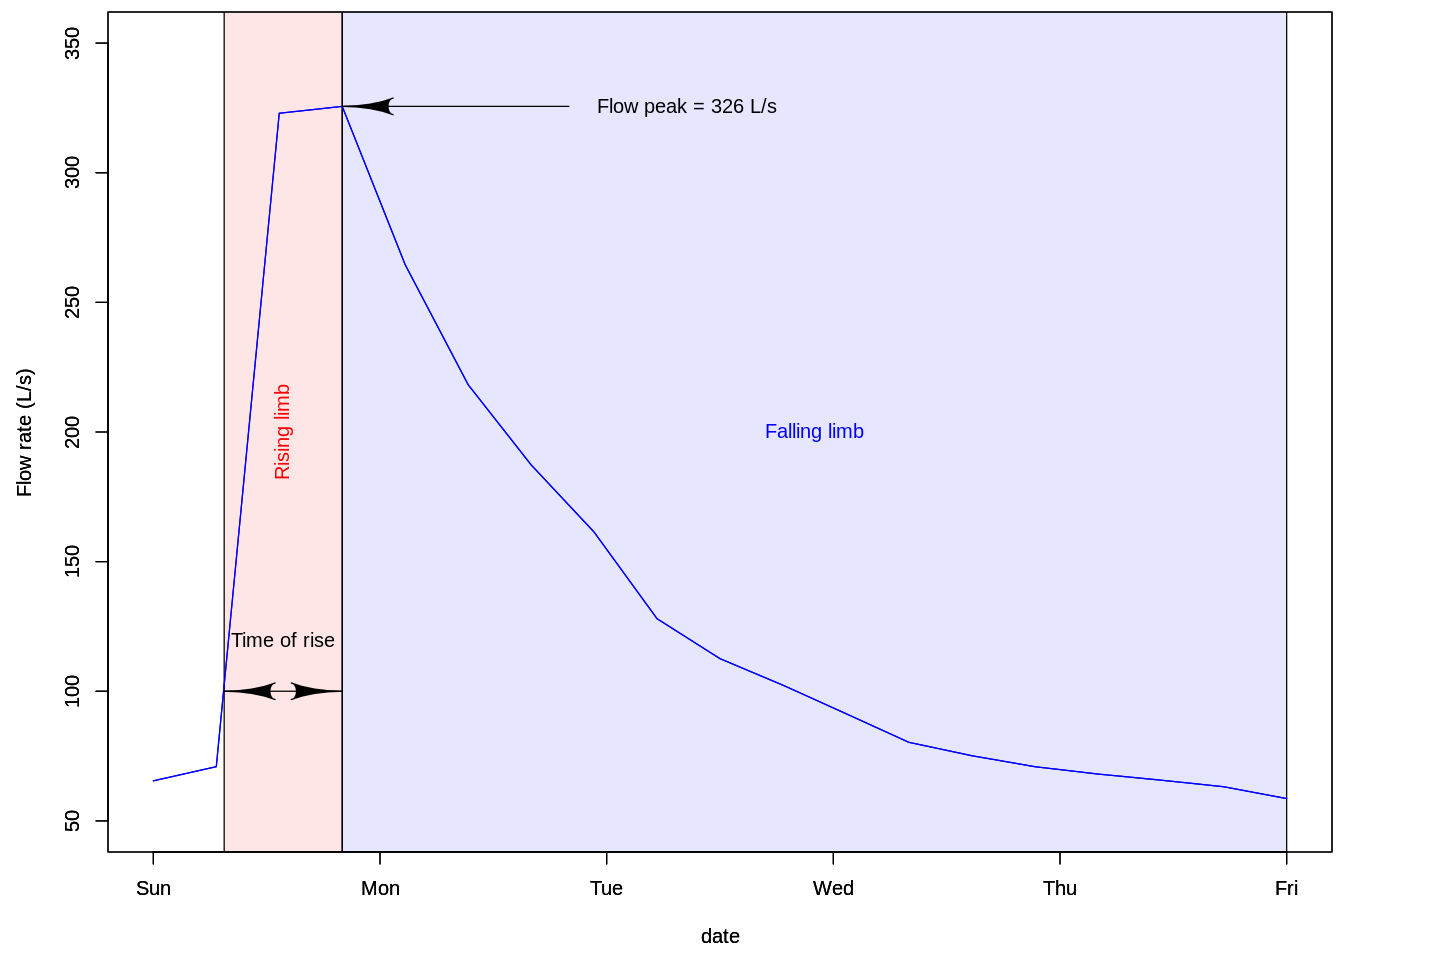

In [22]:
install.packages("shape")
library(shape)
  par(mar=c(4.5,4.5,0.5,4.5))
  options(repr.plot.width=12, repr.plot.height=8)
  transpred <- rgb(250, 0, 0, max = 255, alpha = 25) # this defines the color of the transparent color of the pinkish rectangle
  transpblue <- rgb(0, 0, 250, max = 255, alpha = 25) # this defines the color of the transparent color of the red rectangle
  xlimHG=as.POSIXct(c("1999-01-03 00:00:00","1999-01-08 00:00:00"));ylimHG=c(50,350) # this defines the plotting ranges for the x and y axes
  flowpeak<-max(Q) # this calculates the flow rate at the peak
  peaktime<-as.POSIXct(date[which(Q==max(Q))]) # this returns date for the peaktime. The function which(Q==max(Q)) is used to return the row number corresponding to when Q is maximum
  HGbegtime<-as.POSIXct("1999-01-03 7:30:00") # this defines the date for the beginning of the hydrograph
  HGendtime<-as.POSIXct("1999-01-08 00:00:00") # this defines the date for the end of the hydrograph
  
  plot(date,Q,xlab = "date",ylab = "Flow rate (L/s)",type = "l",col="blue",xlim=xlimHG,ylim=ylimHG) # this plots the hydrograph
  rect(as.numeric(HGbegtime),0,as.numeric(peaktime),400,col = transpred) # this plots the red rectangle highlighting the period of rising limb
  rect(as.numeric(peaktime),0,as.numeric(HGendtime),400,col = transpblue) # this plots the blue rectangle highlighting the period of falling limb
  par(new=TRUE) # this says that we are plotting additional time series onto the existing plot. Without par(new=TRUE), the previous plot would be overwritten
  
  plot(date,Q,xlab = "date",ylab = "Flow rate (L/s)",type = "l",col="blue",xlim=xlimHG,ylim=ylimHG) # plotting the same plot so that it be on top of the rectangles
  text((as.numeric(HGbegtime)+as.numeric(peaktime))/2,200,"Rising limb", col = "red",srt = 90) # adds the text "rising limb" at the right spot inside the red rectangle
  text((as.numeric(peaktime)+as.numeric(HGendtime))/2,200,"Falling limb", col = "blue") # adds the text "falling limb" at the right spot inside the blue rectangle
  Arrows(as.numeric(HGbegtime),100, as.numeric(peaktime),100, arr.adj = 1, code=3) # adds a double sided arrow in the rising limb phase
  text((as.numeric(peaktime)+as.numeric(HGbegtime))/2,120,"Time of rise") # adds text above the double sided arrow in the rising limb phase
  Arrows(as.numeric(peaktime)+24*60*60,flowpeak, as.numeric(peaktime),flowpeak, arr.adj = 1, code=2) # adds a single sided arrow to show the peak
  text(as.numeric(peaktime)+27*60*60,flowpeak,paste0("Flow peak = ",signif(flowpeak,digits = 3)," L/s"),adj = c(0,0.5)) # adds the text with automatic writing of the peak flow rate

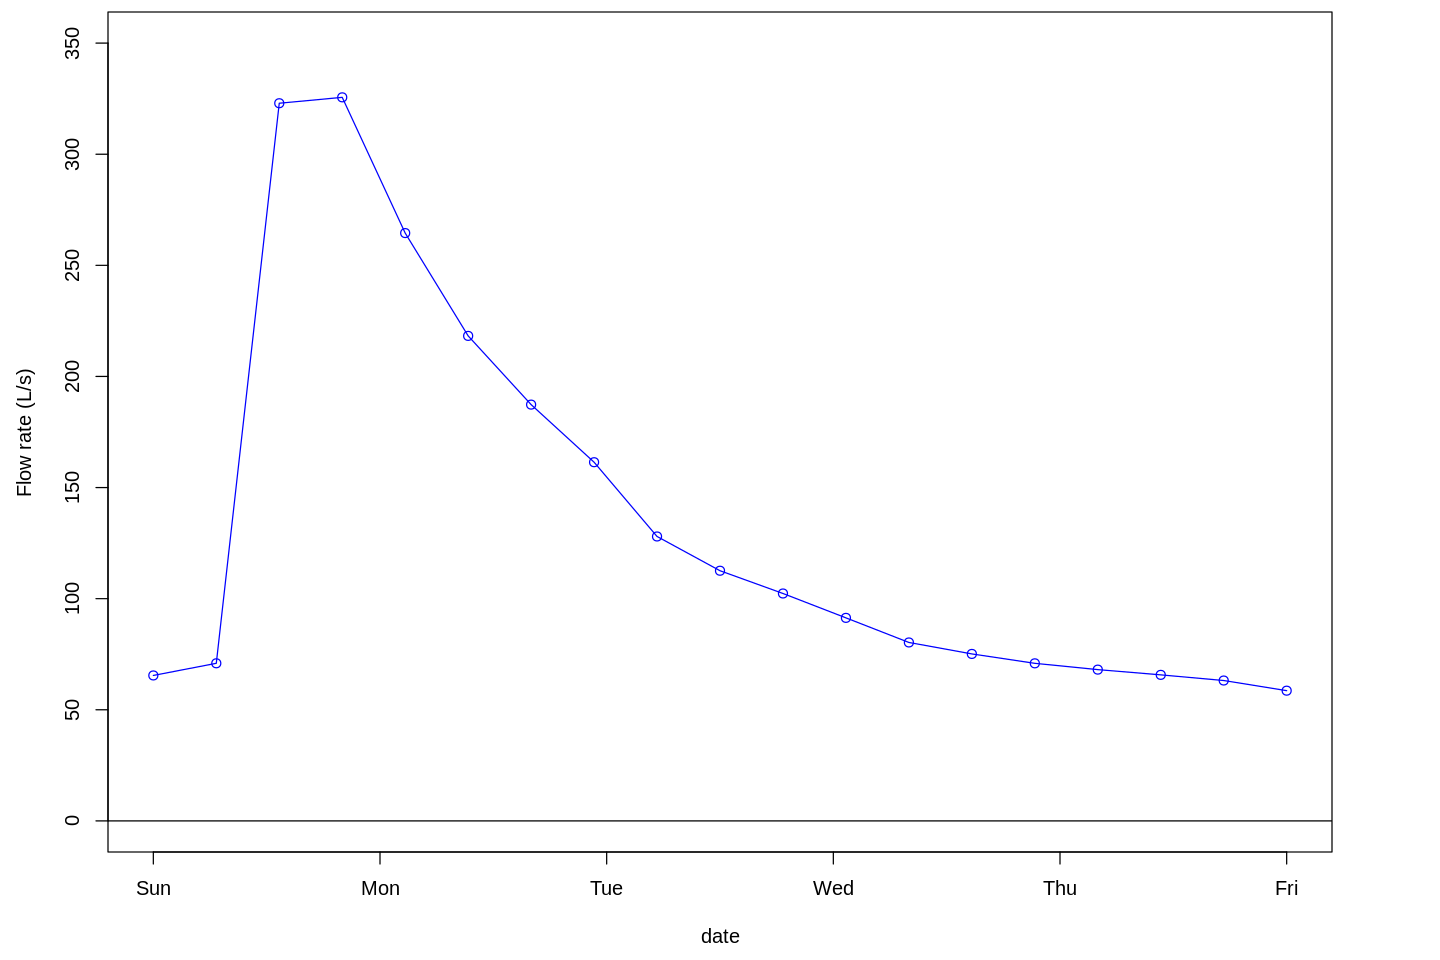

In [25]:
hydgph2<-read.csv(file = "simplified-hydgrph.csv", header = TRUE)
options(repr.plot.width=12, repr.plot.height=8)
names(hydgph2)=c("date","Q","NO3")
date=as.POSIXct(hydgph2$date, format = "%Y-%m-%d %H:%M:%S") # transforms the first column of the file, which are characters into dates that R understands
Q=hydgph2$Q*1000 # Puts in the variable Q the flow rates, which are orginally in m³/s to L/s for better visualization
C=hydgph2$NO3
par(mar=c(4.5,4.5,0.5,4.5))
xlimHG=as.POSIXct(c("1999-01-03 00:00:00","1999-01-08 00:00:00"));ylimHG=c(0,350) # this defines the plotting ranges for the x and y axes
ylimC=c(0,8) # this defines the range of concentration for plotting
plot(date,Q,xlab = "date",ylab = "Flow rate (L/s)",type = "o",col="blue",xlim=xlimHG,ylim=ylimHG) # this plots the hydrograph
abline(h=0) # this adds a line at the bottom for y=0

We can now also plot the chemograph, i.e., the concentration as a function of time

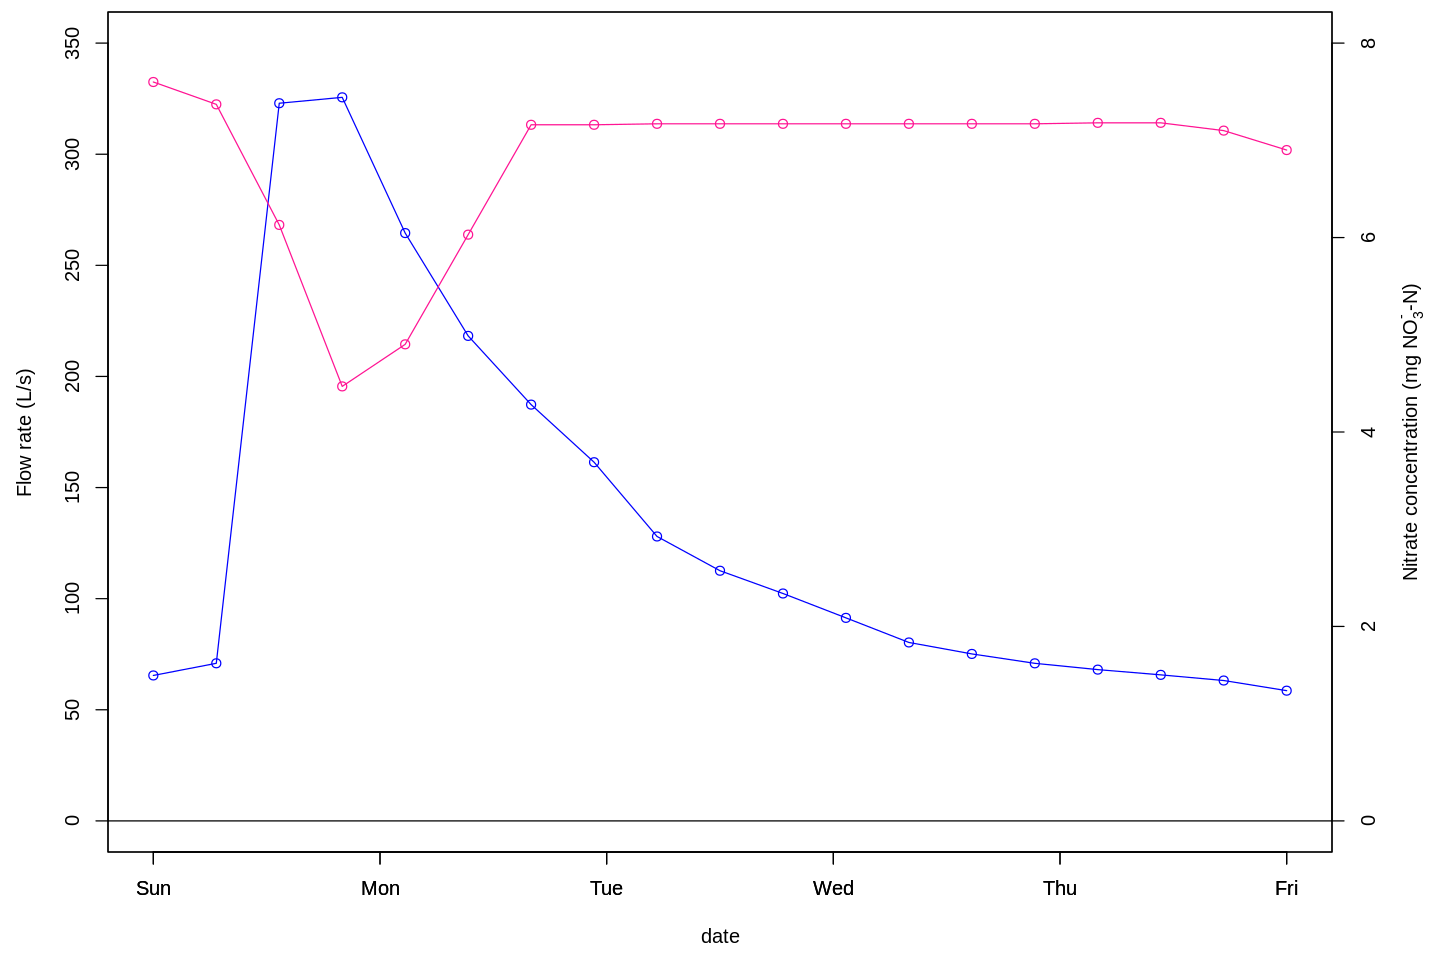

In [27]:
par(mar=c(4.5,4.5,0.5,4.5))
plot(date,Q,xlab = "date",ylab = "Flow rate (L/s)",type = "o",col="blue",xlim=xlimHG,ylim=ylimHG) # this plots the hydrograph
par(new = TRUE)
plot(date,C,xlab = "",ylab = "",type = "o",col="deeppink1",xlim=xlimHG,ylim=ylimC, yaxt = "n") 
y2lab<-substitute(paste("Nitrate concentration (mg ",NO[x]^{y},"-N)",sep=""),list(x=3,y="-")) # defines the label for concentrations
axis(4) # this plots the hydrograph
abline(h=0) # this adds a line at the bottom for y=0
mtext(y2lab,side=4,line=3)

We can now calculate the mean, maximum, minimum, median flow values

In [28]:
meanQ<- mean(Q)
maxQ<- max(Q)
minQ<- min(Q)
medianQ<- median(Q)
paste0("mean flow is", meanQ,"L/s")

[1] "mean flow is133.292008842105L/s"

In [30]:
paste0("mean flow is", signif(meanQ,3)," L/s")

[1] "mean flow is133 L/s"

### Calculate the mean, maximum, minimum and median nitrate concentrations

### Calculating water fluxes or cumulative flow volumes
  
  Flow peaks matter very much for flooding issues and an entire domain of hydrology and statistical hydrology is devoted to calculating and predicting flow peaks generating floods. For water quality purposes, flow volumes matter just as much as flow peaks do. Indeed, the amount or load of pollutants leaving a field or a watershed, or delivered in a receiving water body, depends on the total volume of water, and, on the concentrations.
  
  Flow volumes or cumulative flows, correspond to the cumulative volume of water that has passed at a particular point over a given period. Mathematically, this means that flow volumes correspond to the integral over time of the instantaneous flow rates. or 

</br>

  $CumulQ = \int_{}^{period}{Q(t).dt}$

</br>
  
  In practice, because the instantaneous flow rates are discrete in time, 
  
</br>

$CumulQ = \sum_{i=1}^{n-1}{\frac{(Q_i + Q_{i+1})}{2}}.time \space interval$

  

The next thing to do for us is to first calculate the time interval, and somehow integrate under the hydrograph curve. It turns out that in `R`, there is a very smart and simple way to calculate cumulative flow, loads, etc. of a time series (TS here) using the code below: 

In [34]:
time_Interval <- date[2]-date[1]
time_Interval

Time difference of 6.666667 hours

In [35]:
cumulQ=c(0,(cumsum(Q[-1])+cumsum(head(Q,-1)))/2)*3600*time_Interval
cumulQ

Time differences in hours
 [1]        0  1636440  6362880 14145458 21226887 27020138 31887098 36071935
 [9] 39544636 42431302 45010102 47334382 49394214 51259320 53011712 54679352
[17] 56284756 57831338 59292556

### Characteristics of a hydrograph
  
  A hydrograph is characterized by a ***fast rising limb***, and a ***slower falling limb***. This is the typical response of flow following a rainfall event. The time it takes to go from the beginning of what we refer to as ***an event*** to the peak is called ***time of rise***. The maximum of the flow rate is referred to as ***peakflow***.
  
### Actual hydrograph over an entire year
  
  The goal of the first part above was to realize that there is no such thing as *continuous data*, but that really all data around the world is an assemblage of discontinuous data points. In the case of hydrological data, all points are auto-correlated, and provided that flow be measured frequently enough, then a linear interpolation between consecutive points is just fine. 
  
  Now, let us explore what a typical yearly hydrograph of a watershed in a temperate climate where snow does not play a significant role. The conventional acronym for flow rates is the letter *Q*.

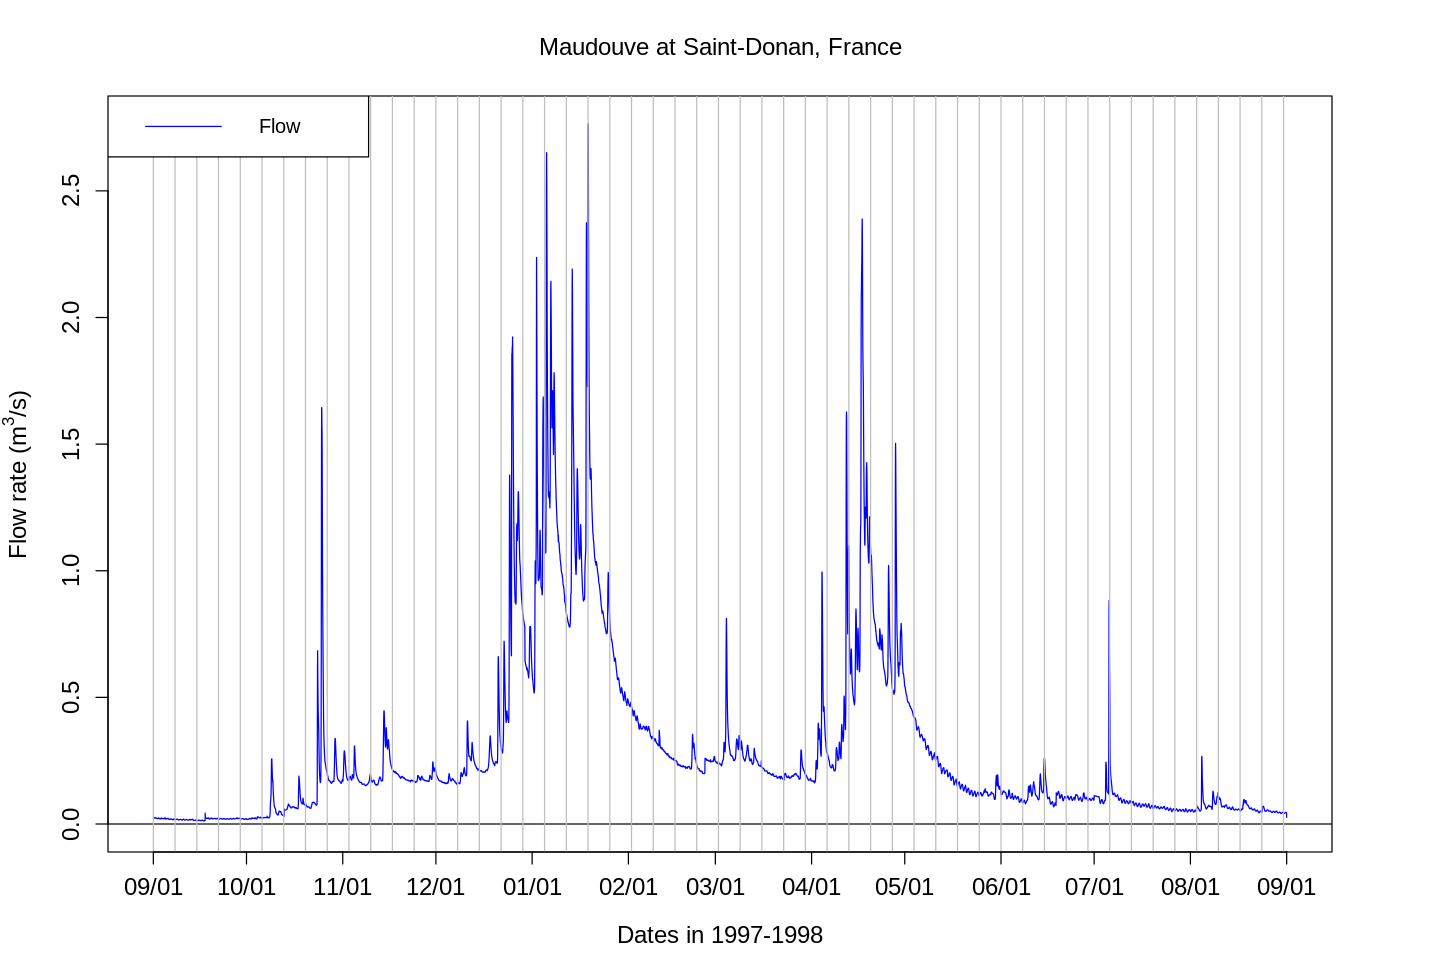

In [8]:
data<-read.csv(file="sample_1hr_QC_data.csv",header = TRUE) #Reads file into table format
  options(repr.plot.width=12, repr.plot.height=8)
  WSarea<-24.2 #Area of watershed in km2
  WS<-"Maudouve at Saint-Donan, France"
  names(data)=c("datetime","Q","C")   # renames the columns in simpler names
  data<-as.data.frame(data)
  data$datetime<-as.POSIXct(strptime(data$datetime, "%Y-%m-%d %H:%M:%S")) # transforms characters into date values understood by R
  D<-data$datetime
  Q<-data$Q   #Defines Q as the flow value (m3/s)
  
  N=nrow(data)   #Sets N to the value equal to the number of total rows in the table
  
  # definition of the x and y axes limits
  
  startdate<-D[1]
  enddate<-D[N]
  xlim = as.POSIXct(c(startdate,enddate))  # this renders the first and last date understandable for plotting purposes
  ylimQ = c(0,max(Q))           # ylim for flow
      
  ScaleF = 1.2                  # scaling factor for size of fonts and other things
      
  y1lab<-expression("Flow rate (" * m^3 * "/s)")  # defines the label for flow
  
  par(mar=c(4.5,4.5,4,4.5))     # defines the sizes, in number of lines, for the margins (bottom, left, top, right)
  
      ltyp=c(1,2)
      
      plot(D,Q,col="blue",type="l",cex=0.1,yaxt="n",     
           lty=ltyp[1],xaxt="n",xlab="",ylab="",xlim=xlim,ylim=ylimQ)
      # we are taking all the default addition of axis tick marks and numbers out by using xaxt and yaxt = "n"
      # and setting the axis labels at nothing using xlab = "" and ylab = ""
      abline(h=0)
      abline(v=seq(startdate, enddate, by="week"),col=("grey"))
      axis.POSIXct(1, at=seq(startdate, enddate, by="month"), format="%m/%d",cex.axis=ScaleF)
      # this tells R that we want the X axis ticks and values to be displayed as dates, be added on a monthly basis,
      # using the month/day format
      axis(2,cex.axis=ScaleF)
      # this tells R that the first Y axis ticks can be displayed  (that function was repressed earlier by 'yaxt="n" ')
      par(new=TRUE)
      # this tells R that a new plot has already been opened, in other words you are telling R to keep adding things
      # on the existing plot
      
      mtext("Dates in 1997-1998",side=1,line=3,cex=ScaleF) # add in the margin the defined labels and title
      mtext(y1lab,side=2,line=3,cex=ScaleF)
      mtext(WS,side=3,line=1.5,cex=ScaleF)
      
      legend("topleft",c("Flow"),lty = c(1), col = c("blue"))

 Notice that one can see individual hydrographs characterized for the rapid rise of flow rates, followed by a rapid fall. But they seem to occur *on top* of a transient minimum flow rate. The latter is called ***baseflow***. It corresponds to the stream water exclusively fed by groundwater. You can see in this example that there is very low baseflow from September 1^st^ to the 3^rd^ week of October. A large event around that time raises the baseflow to about 250 L/s and this stays almost stable until the end of the third week of December. This is the time when most of the rainfall starts in this part of the world and heavy rainfall last until the middle of January. The baseflow during these 1.5 months rose above 600 L/s. It took about an entire month with nearly no rainfall from the last week of January to the last week of Febraury for baseflow to go down to the pre-December values. Baseflow stays at that general level between the last week of February to the first week of April. Then a series of large rainfall events raise the baseflow back to high levels throughout the month of April. Again, it takes again about one month for baseflow to decrease and then stay stable throughout the month of June. In July and August, even a relative large event at the end of the first week of July does not raise the baseflow level, which steadily disminishes until the beginning of September.
 
 ### Calculating water fluxes or cumulative flow volumes
  
  Flow peaks matter very much for flooding issues and an entire domain of hydrology and statistical hydrology is devoted to calculating and predicting flow peaks generating floods. For water quality purposes, flow volumes matter just as much as flow peaks do. Indeed, the amount or load of pollutants leaving a field or a watershed, or delivered in a receiving water body, depends on the total volume of water, and, on the concentrations.
  
  Flow volumes or cumulative flows, correspond to the cumulative volume of water that has passed at a particular point over a given period. Mathematically, this means that flow volumes correspond to the integral over time of the instantaneous flow rates. or 
  

  $CumulQ = \int_{}^{period}{Q(t).dt}$

  
  In practice, because the instantaneous flow rates are discrete in time, 
  

$CumulQ = \sum_{i=1}^{n-1}{\frac{(Q_i + Q_{i+1})}{2}}.time \space interval$

  
  If we zoom on a hypothetical hydrograph with 5 measurement points, this corresponds to cumulating the area under each trapeze represented below.

In [ ]:
options(repr.plot.width=12, repr.plot.height=12)  
par(mfrow = c(3,2));par(mar=c(4.5,5,0.5,0.5))   
  x<-0:5
  TS<-c(0,1,2,3,4,5)
  time_interval=1 
  xlim=c(0,7)
  ylim=c(0,6)
  
  # First plot: hydrograph
  plot(x,TS,xlim=xlim,ylim=ylim,xlab = 'time (hr)',ylab = 'Q (L/hr)')

  # Second plot: hydrograph + area under the curve
  plot(x,TS,xlim=xlim,ylim=ylim,xlab = 'time (hr)',ylab = 'Q (L/hr)')
  polygx<-cbind(head(x,-1),head(x,-1),x[-1],x[-1],head(x,-1))         # x values of the polygons
  polygy<-cbind(rep(0,length(TS)-1),head(TS,-1),TS[-1],rep(0,length(TS)-1),rep(0,length(TS)-1))   # y values of the polygons
  for (j in 1:(length(TS)-1)){polygon((as.vector(polygx[j,])),as.vector(polygy[j,]),col="lightblue")}
  par(new=TRUE)
  plot(x,TS,xlim=xlim,ylim=ylim,xlab="",ylab="",xaxt="n",yaxt="n")     
  
  # Third plot: hydrograph + step area under the curve
  suprectxy=cbind(0:4,rep(0,5),1:5,TS[2:6])
  infrectxy=cbind(0:4,rep(0,5),1:5,TS[1:5])
  plot(x,TS,xlim=xlim,ylim=ylim,xlab = 'time (hr)',ylab = 'Q (L/hr)')
  for (i in 1:5){rect(infrectxy[i,1],infrectxy[i,2],infrectxy[i,3],infrectxy[i,4],col = transpblue)}
  par(new=TRUE)
  plot(x,TS,xlim=xlim,ylim=ylim,xlab="",ylab="",xaxt="n",yaxt="n")     
  
  # Fourth plot: hydrograph + step area above the curve
  plot(x,TS,xlim=xlim,ylim=ylim,xlab = 'time (hr)',ylab = 'Q (L/hr)')
  for (i in 1:5){rect(suprectxy[i,1],suprectxy[i,2],suprectxy[i,3],suprectxy[i,4],col = transpred)}
  par(new=TRUE)
  plot(x,TS,xlim=xlim,ylim=ylim,xlab="",ylab="",xaxt="n",yaxt="n")     
  
  # Fifth plot: hydrograph + step area above the curve
  plot(x,TS,xlim=xlim,ylim=ylim,xlab = 'time (hr)',ylab = 'Q (L/hr)')
  for (i in 1:5){rect(infrectxy[i,1],infrectxy[i,2],infrectxy[i,3],infrectxy[i,4],col = transpblue)}
  for (i in 1:5){rect(suprectxy[i,1],suprectxy[i,2],suprectxy[i,3],suprectxy[i,4],col = transpred)}




  One could calculate the cumulative flow by adding over time the area under each trapeze at in the example below. The result of this mock unitless 'hydrograph' are displayed underneath.

In [ ]:
 cumTS_inst=matrix(0,5,1)
  # 10 values, the first one being 0 to associate to initial time
  for (i in 1:4){QQ=(TS[i]+TS[i+1])*time_interval/2;cumTS_inst[i+1]=cumTS_inst[i]+QQ}
  as.vector(cumTS_inst)

It turns out that in R, there is a very smart and simple way to calculate cumulative flow, loads, etc. of a time series (TS here) using the code below:

In [ ]:
  c(0,(cumsum(TS[-1])+cumsum(head(TS,-1)))/2)*time_interval

The magic comes the function `cumsum()` which calculates the cumulative sum of a vector and generates a vector of the same length of the original one:

In [ ]:
 TS
  cumsum(TS)

Now, one can remove the ***first*** point of a time series, using the following code, and calculate the cumulative sum of this new vector

In [ ]:
TS[-1]
  cumsum(TS[-1])

Now, one can remove the ***last*** point of a time series, using the following code

In [ ]:
head(TS,-1)
  cumsum(head(TS,-1))

  and the fact that each trapeze is the average of two rectangles represented below:

In [ ]:
  par(mar=c(4.5,4.5,0.5,0.5))
  plot(x,TS,xlim=xlim,ylim=ylim)
  suprectxy=cbind(0:4,rep(0,5),1:5,TS[2:6])
  infrectxy=cbind(0:4,rep(0,5),1:5,TS[1:5])
  for (i in 1:5){rect(infrectxy[i,1],infrectxy[i,2],infrectxy[i,3],infrectxy[i,4],col = transpblue)}
 for (i in 1:5){rect(suprectxy[i,1],suprectxy[i,2],suprectxy[i,3],suprectxy[i,4],col = transpred)}

  Let us apply this method to the Maudouve hydrograph plotted earlier. Calculating the cumulative flow corresponds to integrating under the hydrograph curve, as represented by the grey area on the left panel. The corresponding cumulative flow, expressed in mm is plotted on the right side of the plots.

[1] 378


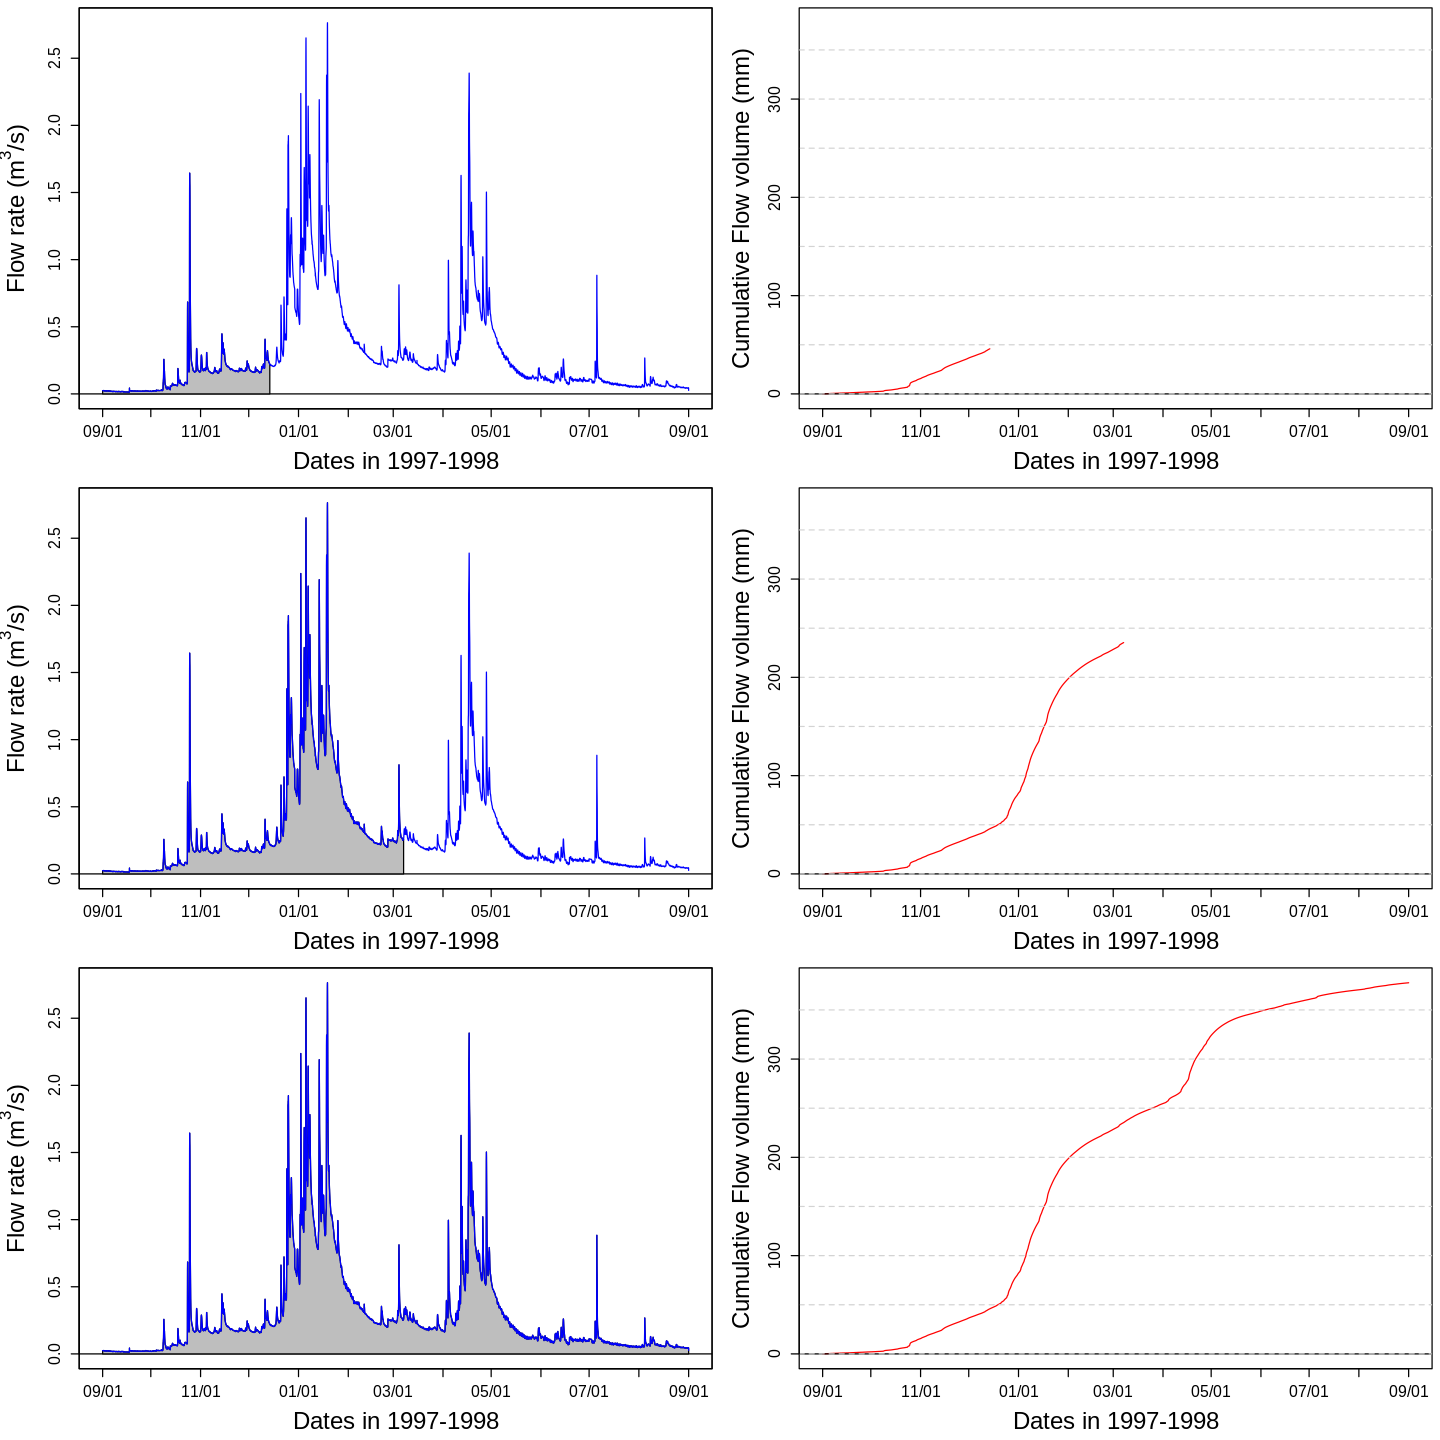

In [11]:
  par(mfrow = c(3,2));par(mar=c(4.5,5,0.5,0.5))
  options(repr.plot.width=12, repr.plot.height=12)
  xlim = as.POSIXct(c(startdate,enddate))    
      n=c(2500,4500,N)
  for (i in 1:3){
    plot(0,0,col="blue",type="l",cex=0.1,yaxt="n",     
           lty=ltyp[1],xaxt="n",xlab="",ylab="",xlim=xlim,ylim=ylimQ)
      abline(h=0)
      axis.POSIXct(1, at=seq(startdate, enddate, by="month"), format="%m/%d",cex.axis=ScaleF)
      axis(2,cex.axis=ScaleF)
      polygon(c(D[1:n[i]],D[n[i]:1]),c(Q[1:n[i]],rep(0,n[i])),col="grey")
      par(new=TRUE)
      plot(D,Q,col="blue",type="l",cex=0.1,yaxt="n",     
           lty=ltyp[1],xaxt="n",xlab="",ylab="",xlim=xlim,ylim=ylimQ)
      mtext("Dates in 1997-1998",side=1,line=3,cex=ScaleF) # add in the margin the defined labels and title
      mtext(y1lab,side=2,line=3,cex=ScaleF)
          
  cumQ=c(0,(cumsum(Q[-1])+cumsum(head(Q,-1)))/2)*3600/WSarea/1000 # calculates in mm the cumulative flow for each time stamp 
  
  
  plot(D[1:n[i]],cumQ[1:n[i]],col="red",type="l",cex=0.1,yaxt="n",     
           lty=ltyp[1],xaxt="n",xlab="",ylab="",xlim=xlim,ylim=c(0,cumQ[N]))
      abline(h=0)
      abline(h=seq(0,1000,by=50),lty=2,col="lightgrey")
      axis.POSIXct(1, at=seq(startdate, enddate, by="month"), format="%m/%d",cex.axis=ScaleF)
      axis(2,cex.axis=ScaleF)
      par(new=TRUE)
      mtext("Dates in 1997-1998",side=1,line=3,cex=ScaleF) # add in the margin the defined labels and title
      mtext("Cumulative Flow volume (mm)",side=2,line=3,cex=ScaleF)
  }
      
    print(signif(max(cumQ),digits = 3)) # displays the final cumulative flow value in m3

  Notice that  most of the increase of the cumulative flow occurs during the January and April periods described above.
  
### Evaluating the importance of rare high flow events: flow duration curves
  
#### Sorting flow and load values
  
  Flow occurs permanent streams throughout the year, but with bursts following rainfall events, which are, in most places on earth relatively rare. For example, in North Carolina, it rains about 7% of the time. Most of the flow occurs after these rare occurrences. The idea behind the ***duration curve*** concept is to characterize the importance of high flow events in the overall volume of water generated.
  
  Flow duration curves represent the percentage of the total flow that occurred in x% of the time corresponding to the highest flows. The same applies for loads. This might sound a bit murky, but hopefully it will not with the further explanations below. To get there, one first needs to order flow and loads in descending order. 





In [ ]:
  QSort=sort(Q,decreasing = TRUE)   #Sorts instantaneous flow rates in descending order